In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [21]:
data = pd.read_csv('spm_survey_data.csv')
print("Data Loaded Successfully")
print(data.head())

Data Loaded Successfully
   Gender  Group number  \
0  Female            12   
1    Male            16   
2  Female             1   
3    Male             2   
4  Female            15   

   How clear were the objectives and goals of the offline project management activity?\nวัตถุประสงค์และเป้าหมายของกิจกรรมการจัดการโครงการออฟไลน์ชัดเจนเพียงใด  \
0                                                  1                                                                                                            
1                                                  4                                                                                                            
2                                                  4                                                                                                            
3                                                  3                                                                                                            
4      

In [23]:
# Rename columns to shorter names
data = data.rename(columns={
    'How clear were the objectives and goals of the offline project management activity?\nวัตถุประสงค์และเป้าหมายของกิจกรรมการจัดการโครงการออฟไลน์ชัดเจนเพียงใด': 'Objective Clarity',
    'How relevant and applicable was the content discussed in the activity to your current or future project management work? \nเนื้อหาที่หารือในกิจกรรมมีความเกี่ยวข้องและสามารถนำไปใช้กับงานการจัดการโครงการปัจจุบันหรือในอนาคตของคุณมากเพียงใด': 'Content Relevance',
    'How engaging were the activities, discussions, and exercises during the session?\nกิจกรรม การอภิปราย และการฝึกหัดในระหว่างเซสชันมีส่วนร่วมมากเพียงใด': 'Engagement',
    'How well did the group collaborate and communicate during the offline activity?\nกลุ่มทำงานร่วมกันและสื่อสารกันได้ดีเพียงใดในระหว่างกิจกรรมออฟไลน์': 'Group Collaboration',
    'How much did you learn from this offline activity that you can apply to your role as a project manager?\nคุณได้เรียนรู้อะไรจากกิจกรรมออฟไลน์นี้บ้าง ซึ่งคุณสามารถนำไปปรับใช้กับบทบาทของคุณในฐานะผู้จัดการโครงการได้': 'Learning',
    'How well did the offline activity adhere to the planned schedule, balancing discussions and exercises?\nกิจกรรมออฟไลน์ยึดมั่นตามกำหนดการที่วางแผนไว้โดยสมดุลระหว่างการสนทนาและการออกกำลังกายได้ดีเพียงใด': 'Schedule Adherence',
    'How valuable were the opportunities for networking and interacting with other participants?\nโอกาสในการสร้างเครือข่ายและการโต้ตอบกับผู้เข้าร่วมคนอื่นๆ มีค่าเพียงใด?': 'Networking Value',
    'How confident are you in being able to apply the lessons learned from lectures and workshop to your current or future projects? คุณมีความมั่นใจเพียงใดในการนำบทเรียนที่เรียนรู้จากการบรรยายและการฝึกอบรมไปใช้กับโครงการปัจจุบันหรือในอนาคตของคุณได้?': 'Confidence',
    'Overall, how satisfied were you with the offline project management activity?\nโดยรวมแล้วคุณพึงพอใจกับกิจกรรมการจัดการโครงการออฟไลน์มากเพียงใด': 'Overall Satisfaction'
})
print(data)

     Gender  Group number  Objective Clarity  Content Relevance  Engagement  \
0    Female            12                  1                  3           3   
1      Male            16                  4                  5           5   
2    Female             1                  4                  4           4   
3      Male             2                  3                  3           3   
4    Female            15                  5                  5           5   
..      ...           ...                ...                ...         ...   
133  Female            11                  3                  4           4   
134    Male            38                  3                  4           2   
135    Male            36                  3                  4           3   
136  Female            20                  5                  5           5   
137  Female            10                  3                  3           3   

     Group Collaboration  Learning  Schedule Adhere

In [24]:
#Descriptive Statistics
print("\n Descriptive Statistics:")
print(data.describe())


 Descriptive Statistics:
       Group number  Objective Clarity  Content Relevance  Engagement  \
count    138.000000         138.000000         138.000000  138.000000   
mean      20.115942           4.094203           4.166667    4.123188   
std       11.091571           0.743710           0.740717    0.758917   
min        1.000000           1.000000           2.000000    2.000000   
25%       11.000000           4.000000           4.000000    4.000000   
50%       20.000000           4.000000           4.000000    4.000000   
75%       28.000000           5.000000           5.000000    5.000000   
max       41.000000           5.000000           5.000000    5.000000   

       Group Collaboration    Learning  Schedule Adherence  Networking Value  \
count           138.000000  138.000000          138.000000        138.000000   
mean              4.202899    4.094203            4.079710          4.166667   
std               0.784516    0.753461            0.745415          0.824651

In [7]:
mean_clarity = 4.0942
mean_relevance = 4.1667
mean_engagement = 4.1232
mean_collab = 4.2029
mean_learning = 4.0942
mean_schedule = 4.0797
mean_networking = 4.1667
mean_confidence = 4.1304
mean_overall = 4.1884

mean_values = [mean_clarity,mean_relevance,mean_engagement,mean_collab,mean_learning,mean_schedule,mean_networking,mean_confidence,mean_overall]

C:\Users\ASUS\AppData\Local\Temp\ipykernel_9604\4136802960.py:34: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fontsize=8, frameon=False, ncol=2)


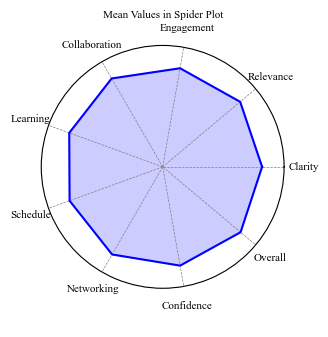

In [9]:
# Mean values and corresponding labels
categories = [
    "Clarity", "Relevance", "Engagement", "Collaboration", 
    "Learning", "Schedule", "Networking", "Confidence", "Overall"
]
mean_values = [
    4.0942, 4.1667, 4.1232, 4.2029, 
    4.0942, 4.0797, 4.1667, 4.1304, 4.1884
]

# Add the first mean value to the end to close the circular graph
mean_values.append(mean_values[0])

# Calculate angles for the radar chart
angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
angles += angles[:1]  # Close the circle

# Create the radar chart
fig, ax = plt.subplots(figsize=(3.5, 3.5), subplot_kw=dict(polar=True))  # IEEE single-column width
ax.fill(angles, mean_values, color='blue', alpha=0.2)
ax.plot(angles, mean_values, color='blue', linewidth=1.5)

# Add category labels
ax.set_yticks([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=8, fontname="Times New Roman")

# Grid lines and formatting
ax.spines['polar'].set_visible(True)
ax.grid(color='gray', linestyle='--', linewidth=0.5)
ax.set_ylim(0, 5)

# Adjust the legend placement
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fontsize=8, frameon=False, ncol=2)

# Add a title
plt.title("Mean Values in Spider Plot", size=8, pad=20, fontname="Times New Roman")

# Save as a high-resolution file
plt.tight_layout()
plt.savefig("spider_plot_ieee_format_updated.pdf", format="pdf", dpi=300)  # Save for IEEE
plt.savefig("spider_plot_ieee_format_updated.png", format="png", dpi=300)  # Optional: PNG format
plt.show()

In [10]:
from scipy.stats import spearmanr

corr1, p_value = spearmanr(data['Confidence'], data['Overall Satisfaction'])
print(f"Spearman's Rank Correlation: {corr1}, p-value: {p_value}")

if p_value < 0.05:
    print("There is a significant correlation between the variables.")
else:
    print("There is no significant correlation between the variables.")

Spearman's Rank Correlation: 0.7177996981303377, p-value: 3.903874645855146e-23
There is a significant correlation between the variables.


In [11]:
corr2, p_value = spearmanr(data['Objective Clarity'], data['Learning'])
print(f"Spearman's Rank Correlation: {corr2}, p-value: {p_value}")

if p_value < 0.05:
    print("There is a significant correlation between the variables.")
else:
    print("There is no significant correlation between the variables.")

Spearman's Rank Correlation: 0.6285923823974477, p-value: 1.5290032602727175e-16
There is a significant correlation between the variables.


In [12]:
corr3, p_value = spearmanr(data['Content Relevance'], data['Confidence'])
print(f"Spearman's Rank Correlation: {corr3}, p-value: {p_value}")

if p_value < 0.05:
    print("There is a significant correlation between the variables.")
else:
    print("There is no significant correlation between the variables.")

Spearman's Rank Correlation: 0.5762936775776595, p-value: 1.4039549998099733e-13
There is a significant correlation between the variables.


In [13]:
corr4, p_value = spearmanr(data['Objective Clarity'], data['Content Relevance'])
print(f"Spearman's Rank Correlation: {corr4}, p-value: {p_value}")

if p_value < 0.05:
    print("There is a significant correlation between the variables.")
else:
    print("There is no significant correlation between the variables.")

Spearman's Rank Correlation: 0.6408765605938562, p-value: 2.5405618619359885e-17
There is a significant correlation between the variables.


In [25]:
corr5, p_value = spearmanr(data['Group Collaboration'], data['Learning'])
print(f"Spearman's Rank Correlation: {corr5}, p-value: {p_value}")

if p_value < 0.05:
    print("There is a significant correlation between the variables.")
else:
    print("There is no significant correlation between the variables.")

Spearman's Rank Correlation: 0.5356966338530581, p-value: 1.2860186748824553e-11
There is a significant correlation between the variables.


In [26]:
corr6, p_value = spearmanr(data['Content Relevance'], data['Engagement'])
print(f"Spearman's Rank Correlation: {corr6}, p-value: {p_value}")

if p_value < 0.05:
    print("There is a significant correlation between the variables.")
else:
    print("There is no significant correlation between the variables.")

Spearman's Rank Correlation: 0.5508135495361055, p-value: 2.567320596585133e-12
There is a significant correlation between the variables.


In [27]:
corr7, p_value = spearmanr(data['Content'], data['Collaboration'])
print(f"Spearman's Rank Correlation: {corr7}, p-value: {p_value}")

if p_value < 0.05:
    print("There is a significant correlation between the variables.")
else:
    print("There is no significant correlation between the variables.")

Spearman's Rank Correlation: 0.8540862813193435, p-value: 1.963737794604971e-40
There is a significant correlation between the variables.


In [28]:
corr8, p_value = spearmanr(data['Content'], data['Overall'])
print(f"Spearman's Rank Correlation: {corr8}, p-value: {p_value}")

if p_value < 0.05:
    print("There is a significant correlation between the variables.")
else:
    print("There is no significant correlation between the variables.")

Spearman's Rank Correlation: 0.6971783744138615, p-value: 2.137660767498521e-21
There is a significant correlation between the variables.


In [29]:
corr9, p_value = spearmanr(data['Collaboration'], data['Overall'])
print(f"Spearman's Rank Correlation: {corr9}, p-value: {p_value}")

if p_value < 0.05:
    print("There is a significant correlation between the variables.")
else:
    print("There is no significant correlation between the variables.")

Spearman's Rank Correlation: 0.7326656708587139, p-value: 1.7342732478792162e-24
There is a significant correlation between the variables.


In [30]:
correlation_values = [corr1, corr2, corr3, corr4, corr5, corr6]

labels = ["Confidence vs. Overall Satisfaction",
    "Objective Clarity vs. Learning",
    "Content Relevance vs. Confidence",
    "Objective Clarity vs. Content Relevance",
    "Collaboration vs. Learning",
    "Content Relevance vs. Engagement"
]

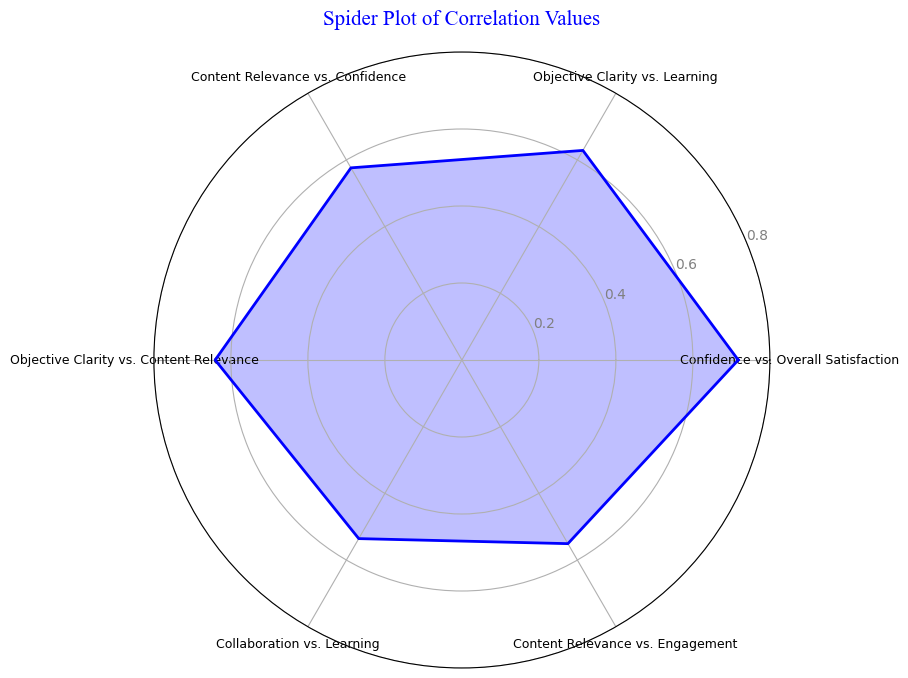

In [31]:
n = len(correlation_values)
angles = np.linspace(0, 2 * np.pi, n,endpoint=False).tolist()  # 2 turns of the spiral

correlation_values += correlation_values[:1]
angles += angles[:1]

# Create figure and axis
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Draw one line per variable
ax.plot(angles, correlation_values, color='blue', linewidth=2, linestyle='solid')
ax.fill(angles, correlation_values, color='blue', alpha=0.25)

# Add labels for each axis
ax.set_yticks([0.2, 0.4, 0.6, 0.8])
ax.set_yticklabels(["0.2", "0.4", "0.6", "0.8"], color="grey", size=10)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, fontsize=9)

# Title
plt.title("Spider Plot of Correlation Values", size=15, color="blue", pad=20, fontname="Times New Roman")

# Display the plot
plt.show()


Mean Difference: -0.00785024154347802
Standard Error: 0.07719193950191458
Z-score: -0.102
P-value: 0.919

Statistical Interpretation:
Fail to reject the null hypothesis (H₀): No significant difference between Content and Collaboration ratings.


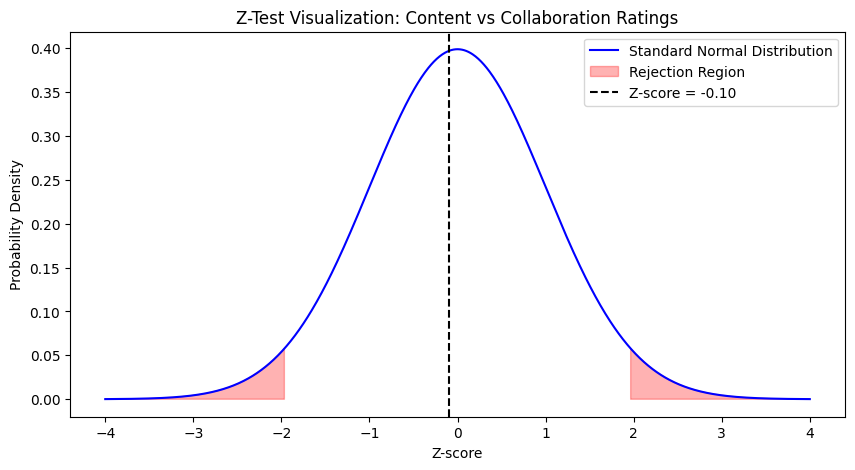

In [35]:
content_scores = np.array([
    2.333333333, 4.666666667, 4, 3, 5, 4, 4, 4, 4.666666667, 4, 5, 4, 4.333333333, 4, 4, 4, 4,
    4, 3.333333333, 5, 3.666666667, 4, 4.333333333, 4.666666667, 3.666666667, 4, 5, 4.666666667, 3, 5, 4,
    3.666666667, 5, 4, 4, 4.666666667, 4, 3.666666667, 4.666666667, 3.333333333, 5, 4.666666667, 4.333333333,
    4, 4, 3, 4, 4, 3.666666667, 5, 5, 4, 4, 4.333333333, 4, 4.666666667, 3.666666667, 3, 3.333333333,
    4, 5, 4.333333333, 4, 3, 4, 4.333333333, 4.666666667, 4, 2.333333333, 4.333333333, 5, 3.333333333,
    4.333333333, 4.333333333, 4.333333333, 3.666666667, 4.333333333, 4.666666667, 5, 5, 4.666666667, 5,
    5, 3, 4, 4, 5, 3.666666667, 4.666666667, 4.333333333, 5, 3.666666667, 4.333333333, 4, 4.333333333,
    4.333333333, 4.333333333, 3, 4.333333333, 4, 4, 4.333333333, 5, 4, 4, 4.333333333, 3, 5, 4, 4, 4, 4,
    4.666666667, 4, 4.333333333, 5, 3.666666667, 2, 4, 4, 4.666666667, 5, 4, 4, 4.666666667, 2.666666667,
    4.333333333, 5, 5, 4.666666667, 3.333333333, 3.666666667, 4.666666667, 3.666666667, 3, 3.333333333, 5, 3])

collaboration_scores = np.array([
    2.25, 4.75, 4.5, 3.25, 5, 4, 4, 4.5, 5, 4, 5, 3.75, 4.5, 4, 4, 4, 4, 4, 3.5, 5, 3.5, 4, 5,
    4.25, 3, 4, 5, 5, 3, 5, 4, 4, 5, 4, 4.25, 4.75, 3.5, 3.5, 4, 3, 5, 3.25, 4.75, 4, 4, 3, 4,
    4, 4, 5, 5, 4, 3.75, 3.5, 4, 4.5, 3.5, 3, 4, 4, 5, 4.5, 4, 3.25, 4, 4.5, 4.75, 4, 3.75,
    4.25, 4.75, 4, 4.5, 4.75, 4.5, 4, 3.75, 4.75, 5, 5, 5, 5, 5, 3, 4, 4, 5, 4.25, 4.75, 4.25, 5,
    4.75, 3.75, 4.25, 4.25, 4, 4.75, 3, 4.25, 4.25, 4, 4, 4.5, 4, 4, 4, 3, 4.75, 4, 4, 4, 3.75,
    4.5, 3.25, 4.5, 5, 3.5, 2.5, 3.25, 4, 4.75, 5, 4, 4, 4.25, 3.75, 4.5, 5, 5, 4.25, 3, 3.5,
    5, 3, 3.75, 3, 5, 3])

# Step 2: Calculate Means

mean_content = np.mean(content_scores)
mean_collaboration = np.mean(collaboration_scores)
mean_diff = mean_content - mean_collaboration
print('Mean Difference:', mean_diff)

# Step 3: Calculate Standard Deviations and Error

pop_std_content = np.std(content_scores, ddof=0)
pop_std_collaboration = np.std(collaboration_scores, ddof=0)
n = len(content_scores)
std_error = np.sqrt((pop_std_content**2 / n) + (pop_std_collaboration**2 / n))
print('Standard Error:', std_error)

# Step 4: Compute Z-Score and P-Value

z_score = mean_diff / std_error
p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))

print(f"Z-score: {z_score:.3f}")
print(f"P-value: {p_value:.3f}")

# Step 5: Interpretation

alpha = 0.05
if p_value < alpha:
    interpretation = "Reject the null hypothesis (H₀): There is a significant difference between Content and Collaboration ratings."
else:
    interpretation = "Fail to reject the null hypothesis (H₀): No significant difference between Content and Collaboration ratings."

print("\nStatistical Interpretation:")
print(interpretation)

# Step 6: Visualization

x = np.linspace(-4, 4, 1000)
y = stats.norm.pdf(x, 0, 1)

plt.figure(figsize=(10, 5))
plt.plot(x, y, label="Standard Normal Distribution", color="blue")

# Shade rejection regions
z_critical = stats.norm.ppf(0.975)
plt.fill_between(x, y, where=(x <= -z_critical) | (x >= z_critical), color='red', alpha=0.3, label="Rejection Region")

# Plot Z-score
plt.axvline(x=z_score, color='black', linestyle="--", label=f"Z-score = {z_score:.2f}")

plt.xlabel("Z-score")
plt.ylabel("Probability Density")
plt.title("Z-Test Visualization: Content vs Collaboration Ratings")
plt.legend()
plt.show()


Mean (Overall): 4.159420289855072
Mean Difference: -0.03140096618115873
Standard Error: 0.0791990535455545
Z-score: -0.396
P-value: 0.692

Statistical Interpretation:
Fail to reject the null hypothesis (H₀): No significant difference between Content and Overall ratings.

Summary:
There is no significant difference between content and overall satisfaction scores.


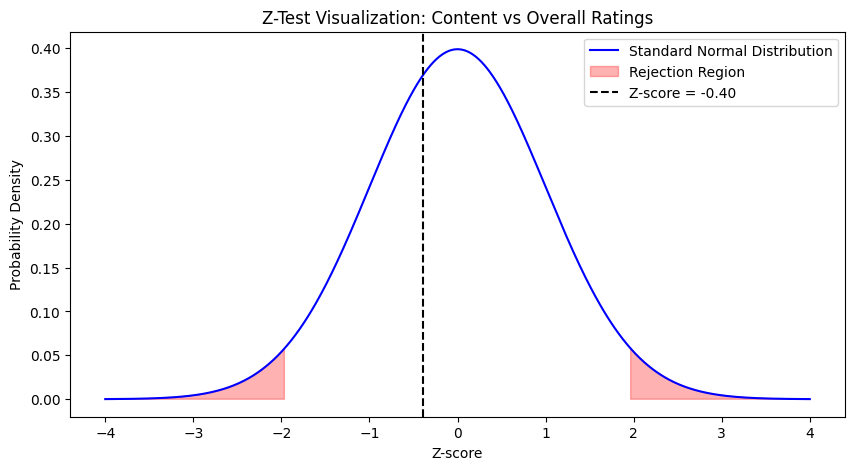

In [36]:
content_scores = np.array([
    2.333333333, 4.666666667, 4, 3, 5, 4, 4, 4, 4.666666667, 4, 5, 4, 4.333333333, 4, 4, 4, 4, 4,
    3.333333333, 5, 3.666666667, 4, 4.333333333, 4.666666667, 3.666666667, 4, 5, 4.666666667, 3, 5, 4,
    3.666666667, 5, 4, 4, 4.666666667, 4, 3.666666667, 4.666666667, 3.333333333, 5, 4.666666667, 4.333333333,
    4, 4, 3, 4, 4, 3.666666667, 5, 5, 4, 4, 4.333333333, 4, 4.666666667, 3.666666667, 3, 3.333333333, 4,
    5, 4.333333333, 4, 3, 4, 4.333333333, 4.666666667, 4, 2.333333333, 4.333333333, 5, 3.333333333, 4.333333333,
    4.333333333, 4.333333333, 3.666666667, 4.333333333, 4.666666667, 5, 5, 4.666666667, 5, 5, 3, 4, 4, 5,
    3.666666667, 4.666666667, 4.333333333, 5, 3.666666667, 4.333333333, 4, 4.333333333, 4.333333333, 4.333333333,
    3, 4.333333333, 4, 4, 4.333333333, 5, 4, 4, 4.333333333, 3, 5, 4, 4, 4, 4, 4.666666667, 4, 4.333333333,
    5, 3.666666667, 2, 4, 4, 4.666666667, 5, 4, 4, 4.666666667, 2.666666667, 4.333333333, 5, 5, 4.666666667,
    3.333333333, 3.666666667, 4.666666667, 3.666666667, 3, 3.333333333, 5, 3])

overall_scores = np.array([
    2, 5, 4, 3, 5, 4, 4, 5, 4.5, 4, 5, 4, 5, 4.5, 4, 4, 4, 4, 3, 5, 3.5, 4, 5, 3.5, 3, 4, 5, 5,
    3, 5, 4, 4, 5, 4, 5, 4, 4, 3, 4.5, 5, 5, 4.5, 4.5, 3.5, 4, 3, 4, 4, 4, 5, 5, 4, 4, 4, 4, 4, 4,
    3, 4, 4.5, 5, 5, 4, 3, 4, 3.5, 4.5, 5, 3.5, 4.5, 4.5, 4, 5, 4.5, 4.5, 4, 4, 5, 5, 5, 5, 5, 5,
    3, 4, 4, 5, 3.5, 4.5, 4, 5, 3.5, 4, 4, 4, 4, 5, 3, 4, 4.5, 4, 4.5, 3.5, 4, 4, 4, 3, 4.5, 4, 3.5,
    4, 4, 5, 3.5, 5, 4, 4.5, 2, 3, 4, 5, 5, 4, 4, 4.5, 4.5, 4, 4.5, 4.5, 4, 3, 4.5, 5, 3, 4, 4.5, 5, 3])

# Step 2: Calculate Means

mean_content = np.mean(content_scores)
mean_overall = np.mean(overall_scores)
mean_diff = mean_content - mean_overall
print('Mean (Overall):', mean_overall)
print('Mean Difference:', mean_diff)

# Step 3: Calculate Standard Deviations and Error

pop_std_content = np.std(content_scores, ddof=0)
pop_std_overall = np.std(overall_scores, ddof=0)
n = len(content_scores)
std_error = np.sqrt((pop_std_content**2 / n) + (pop_std_overall**2 / n))
print('Standard Error:', std_error)

# Step 4: Compute Z-Score and P-Value

z_score = mean_diff / std_error
p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))

print(f"Z-score: {z_score:.3f}")
print(f"P-value: {p_value:.3f}")

# Step 5: Interpretation

alpha = 0.05
if p_value < alpha:
    interpretation = "Reject the null hypothesis (H₀): There is a significant difference between Content and Overall ratings."
    summary = "There is a statistically significant difference between content and overall satisfaction scores."
else:
    interpretation = "Fail to reject the null hypothesis (H₀): No significant difference between Content and Overall ratings."
    summary = "There is no significant difference between content and overall satisfaction scores."

print("\nStatistical Interpretation:")
print(interpretation)
print("\nSummary:")
print(summary)

# Step 6: Visualization

x = np.linspace(-4, 4, 1000)
y = stats.norm.pdf(x, 0, 1)

plt.figure(figsize=(10, 5))
plt.plot(x, y, label="Standard Normal Distribution", color="blue")

# Shade rejection regions
z_critical = stats.norm.ppf(0.975)
plt.fill_between(x, y, where=(x <= -z_critical) | (x >= z_critical), color='red', alpha=0.3, label="Rejection Region")

# Plot Z-score
plt.axvline(x=z_score, color='black', linestyle="--", label=f"Z-score = {z_score:.2f}")

plt.xlabel("Z-score")
plt.ylabel("Probability Density")
plt.title("Z-Test Visualization: Content vs Overall Ratings")
plt.legend()
plt.show()

Mean (Collaboration): 4.135869565217392
Mean (Overall): 4.159420289855072
Mean Difference: -0.02355072463768071
Population Std Dev (Collaboration): 0.640
Population Std Dev (Overall): 0.673
Standard Error: 0.07905119568576428
Z-score: -0.298
P-value: 0.766

Statistical Interpretation:
Fail to reject the null hypothesis (H₀): No significant difference between Collaboration and Overall ratings.

Summary:
There is no significant difference between collaboration and overall satisfaction scores.


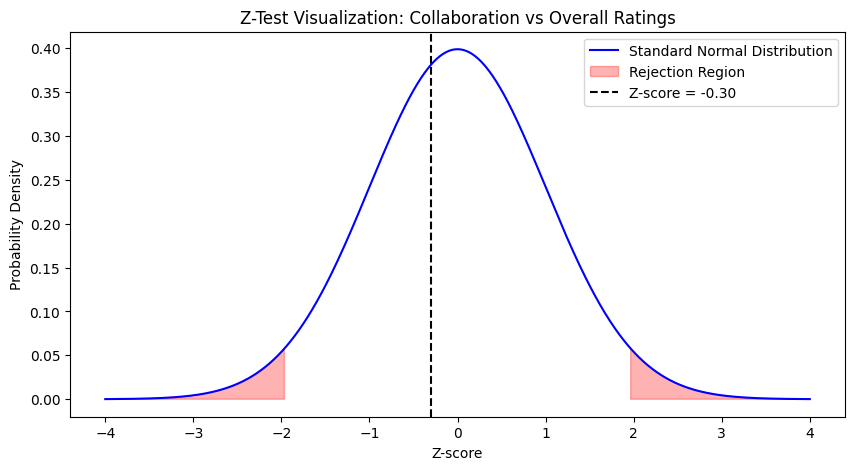

In [34]:
collaboration_scores = np.array([
    2.25, 4.75, 4.5, 3.25, 5, 4, 4, 4.5, 5, 4, 5, 3.75, 4.5, 4, 4, 4, 4, 4, 3.5, 5, 3.5, 4, 5, 4.25,
    3, 4, 5, 5, 3, 5, 4, 4, 5, 4, 4.25, 4.75, 3.5, 3.5, 4, 3, 5, 3.25, 4.75, 4, 4, 3, 4, 4, 4, 5, 5, 4,
    3.75, 3.5, 4, 4.5, 3.5, 3, 4, 4, 5, 4.5, 4, 3.25, 4, 4.5, 4.75, 4, 3.75, 4.25, 4.75, 4, 4.5, 4.75,
    4.5, 4, 3.75, 4.75, 5, 5, 5, 5, 5, 3, 4, 4, 5, 4.25, 4.75, 4.25, 5, 4.75, 3.75, 4.25, 4.25, 4, 4.75,
    3, 4.25, 4.25, 4, 4, 4.5, 4, 4, 4, 3, 4.75, 4, 4, 4, 3.75, 4.5, 3.25, 4.5, 5, 3.5, 2.5, 3.25, 4, 4.75,
    5, 4, 4, 4.25, 3.75, 4.5, 5, 5, 4.25, 3, 3.5, 5, 3, 3.75, 3, 5, 3])

overall_scores = np.array([
    2, 5, 4, 3, 5, 4, 4, 5, 4.5, 4, 5, 4, 5, 4.5, 4, 4, 4, 4, 3, 5, 3.5, 4, 5, 3.5, 3, 4, 5, 5, 3, 5,
    4, 4, 5, 4, 5, 4, 4, 3, 4.5, 5, 5, 4.5, 4.5, 3.5, 4, 3, 4, 4, 4, 5, 5, 4, 4, 4, 4, 4, 4, 3, 4, 4.5,
    5, 5, 4, 3, 4, 3.5, 4.5, 5, 3.5, 4.5, 4.5, 4, 5, 4.5, 4.5, 4, 4, 5, 5, 5, 5, 5, 5, 3, 4, 4, 5, 3.5,
    4.5, 4, 5, 3.5, 4, 4, 4, 4, 5, 3, 4, 4.5, 4, 4.5, 3.5, 4, 4, 4, 3, 4.5, 4, 3.5, 4, 4, 5, 3.5, 5, 4,
    4.5, 2, 3, 4, 5, 5, 4, 4, 4.5, 4.5, 4, 4.5, 4.5, 4, 3, 4.5, 5, 3, 4, 4.5, 5, 3])

# Step 2: Calculate Means

mean_collaboration = np.mean(collaboration_scores)
mean_overall = np.mean(overall_scores)
mean_diff = mean_collaboration - mean_overall

print('Mean (Collaboration):', mean_collaboration)
print('Mean (Overall):', mean_overall)
print('Mean Difference:', mean_diff)

# Step 3: Calculate Standard Deviations and Error

pop_std_collaboration = np.std(collaboration_scores, ddof=0)
pop_std_overall = np.std(overall_scores, ddof=0)
print(f"Population Std Dev (Collaboration): {pop_std_collaboration:.3f}")
print(f"Population Std Dev (Overall): {pop_std_overall:.3f}")

n = len(collaboration_scores)
std_error = np.sqrt((pop_std_collaboration**2 / n) + (pop_std_overall**2 / n))
print('Standard Error:', std_error)

# Step 4: Compute Z-Score and P-Value

z_score = mean_diff / std_error
p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))

print(f"Z-score: {z_score:.3f}")
print(f"P-value: {p_value:.3f}")

# Step 5: Interpretation

alpha = 0.05
if p_value < alpha:
    interpretation = "Reject the null hypothesis (H₀): There is a significant difference between Collaboration and Overall ratings."
    summary = "There is a statistically significant difference between collaboration and overall satisfaction scores."
else:
    interpretation = "Fail to reject the null hypothesis (H₀): No significant difference between Collaboration and Overall ratings."
    summary = "There is no significant difference between collaboration and overall satisfaction scores."

print("\nStatistical Interpretation:")
print(interpretation)
print("\nSummary:")
print(summary)

# Step 6: Visualization

x = np.linspace(-4, 4, 1000)
y = stats.norm.pdf(x, 0, 1)

plt.figure(figsize=(10, 5))
plt.plot(x, y, label="Standard Normal Distribution", color="blue")

# Shade rejection regions
z_critical = stats.norm.ppf(0.975)
plt.fill_between(x, y, where=(x <= -z_critical) | (x >= z_critical), color='red', alpha=0.3, label="Rejection Region")

# Plot Z-score
plt.axvline(x=z_score, color='black', linestyle="--", label=f"Z-score = {z_score:.2f}")

plt.xlabel("Z-score")
plt.ylabel("Probability Density")
plt.title("Z-Test Visualization: Collaboration vs Overall Ratings")
plt.legend()
plt.show()
